# Loan Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
# importing the dataset from local directory
df = pd.read_csv("file:///C:/Git-Projects/Loan-prediction/train_u6lujuX_CVtuZ9i.csv")

In [2]:
df.head(10) #displaying the top 10 rows

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
#looking at the summary of of numeric fields by using describe()
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
# for non-numeric values like Property_Area, Credit_History etc. we can look
# at the frequency distribution to undestand whether they make sense or not.
# the frequncy table can be printed by:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

#### Studying the distributions of various variables

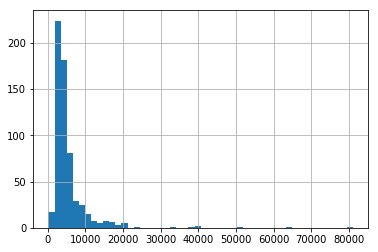

In [6]:
# plotting the histogram of ApplicantIncome
df['ApplicantIncome'].hist(bins=50)

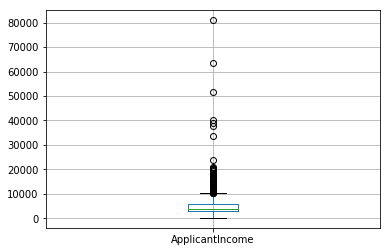

In [7]:
# using box plot to uderstand the distribution
df.boxplot(column='ApplicantIncome')

#### Lot of outliers can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels.

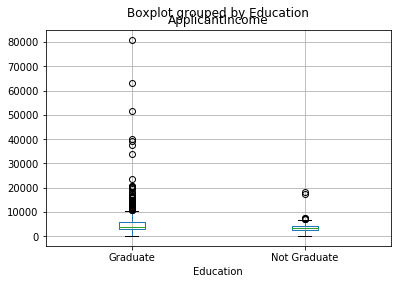

In [9]:
# segregating people by Education
df.boxplot(column= 'ApplicantIncome', by='Education')

#### Taking a look at the histogram and boxplot of LoanAmount 

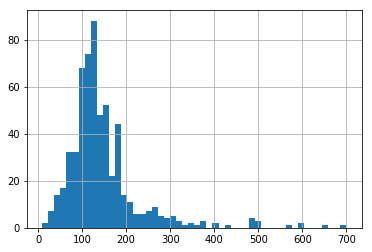

In [10]:
df['LoanAmount'].hist(bins=50)

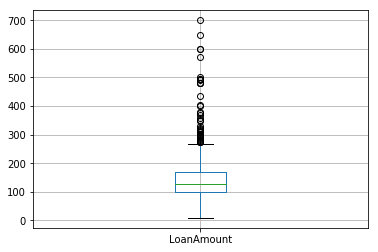

In [12]:
df.boxplot(column='LoanAmount')

In [15]:
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status', index=['Credit_History'], 
                       aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print('Frequency Table for Credit History:')
print(temp1)
print('Probability of getting loan for each credit History class:')
print(temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64
Probability of getting loan for each credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


Text(0.5,1,'Probability of getting loan by credit history')

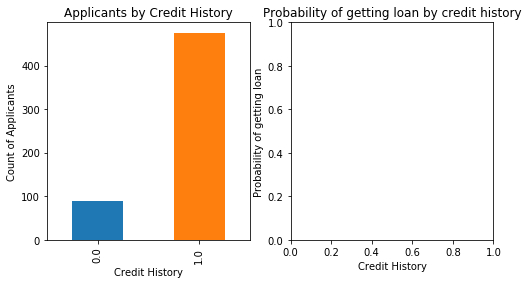

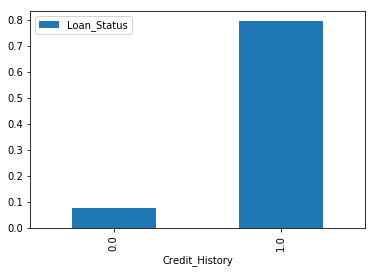

In [19]:
# plotting the pivot table 
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlabel('Credit History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title('Applicants by Credit History')
temp1.plot(kind='bar')

ax2 = fig.add_subplot(1,2,2)
temp2.plot(kind='bar')
ax2.set_xlabel('Credit History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title('Probability of getting loan by credit history')